# Building Churn Prediction System for Customers

## What is churn prediction ?
* let’s take an example, suppose you have taken a premium subscription of the company product now you think that it’s time to leave the subscription, for this you will contact to the company, the company will try to offer some extra functionalities for not leaving the subscription. This is because it will be a loss for any industry that there is some percent of customers are not using their product.

#### For prediction of this kind of situation, there is a data science team is present, that will predict the customer churn based on several features.

## Dataset

* RowNumber—corresponds to the record (row) number and has no effect on the output.
* CustomerId—contains random values and has no effect on customer leaving the bank.
* Surname—the surname of a customer has no impact on their decision to leave the bank.
* CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
* Geography—a customer’s location can affect their decision to leave the bank.
* Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
* Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
* Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to   leave a bank.
* Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank     compared to those with lower balances.
* NumOfProducts—refers to the number of products that a customer has purchased through the bank.
* HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to   leave the bank.
* IsActiveMember—active customers are less likely to leave the bank.
* EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
* Exited—whether or not the customer left the bank.

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data="https://raw.githubusercontent.com/deepakmoud/churnmodeling/main/Project7/Churn_Modelling.csv"

In [ ]:
#importing the dataset
dataset = pd.read_csv(data)
dataset.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [ ]:
dataset.shape

(10000, 14)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
dataset.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [ ]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
#Our target column is 'Exited'
dataset['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
dataset["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
sns.countplot(x=dataset['Exited'],data=dataset)

<Axes: xlabel='Exited', ylabel='count'>

<Axes: xlabel='Gender', ylabel='count'>

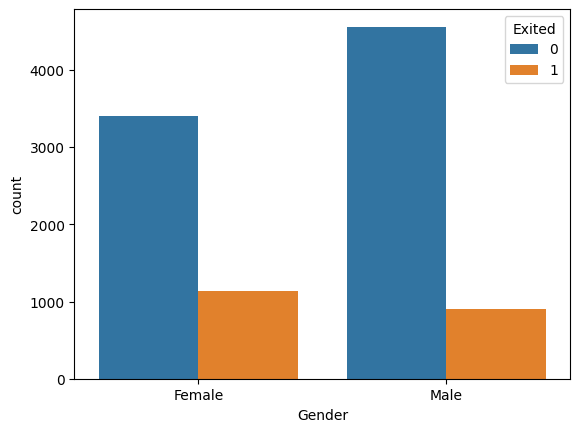

In [ ]:
sns.countplot(x=dataset['Gender'],data=dataset, hue="Exited")

In [ ]:
sns.countplot(x=dataset['Geography'], data=dataset,hue="Exited")

<Axes: xlabel='Geography', ylabel='count'>

In [ ]:
dataset.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [ ]:
#Checking Null Values
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Extracting dependent and independent variables:
# Extracting independent variable:
X = dataset.iloc[:, 3:13].values
# Extracting dependent variable:
y = dataset.iloc[:, 13].values # this is for 1 d array  coming up this will make it 2-d array

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])


In [ ]:
print(X)

[[619 0 0 ... 1 1 101348.88]
 [608 2 0 ... 0 1 112542.58]
 [502 0 0 ... 1 0 113931.57]
 ...
 [709 0 0 ... 0 1 42085.58]
 [772 1 1 ... 1 0 92888.52]
 [792 0 0 ... 1 0 38190.78]]


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
print(X_train)

[[667 2 0 ... 1 0 163830.64]
 [427 1 1 ... 1 1 57098.0]
 [535 0 0 ... 1 0 185630.76]
 ...
 [738 0 1 ... 1 0 181429.87]
 [590 2 0 ... 1 1 148750.16]
 [623 1 0 ... 1 0 118855.26]]


In [ ]:
print(X_test)

[[597 1 0 ... 1 1 192852.67]
 [523 0 0 ... 1 0 128702.1]
 [706 2 0 ... 1 1 75732.25]
 ...
 [578 2 1 ... 1 0 141533.19]
 [650 1 1 ... 1 1 11276.48]
 [573 1 1 ... 1 0 192950.6]]


In [ ]:
print(y_train)

[0 0 0 ... 0 0 1]


In [ ]:
print(y_test)

[0 1 0 ... 0 0 0]


In [ ]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

# The nltk version is 3.0.0.
# The scikit-learn version is 0.15.2.

The nltk version is 3.8.1.
The scikit-learn version is 1.2.2.


In [ ]:
# Feature Scaling
# Standard Scaling:  Standardization = X'=X-mean(X)/standard deviation
# normal scaling : Normalization= X'=X-min(X)/max(x)-min(X)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

In [ ]:
print(X_train_scaled)

[[ 0.16958176  1.51919821 -1.09168714 ...  0.64259497 -1.03227043
   1.10643166]
 [-2.30455945  0.3131264   0.91601335 ...  0.64259497  0.9687384
  -0.74866447]
 [-1.19119591 -0.89294542 -1.09168714 ...  0.64259497 -1.03227043
   1.48533467]
 ...
 [ 0.9015152  -0.89294542  0.91601335 ...  0.64259497 -1.03227043
   1.41231994]
 [-0.62420521  1.51919821 -1.09168714 ...  0.64259497  0.9687384
   0.84432121]
 [-0.28401079  0.3131264  -1.09168714 ...  0.64259497 -1.03227043
   0.32472465]]


In [ ]:
X_test_scaled

array([[-0.55204276,  0.3131264 , -1.09168714, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-1.31490297, -0.89294542, -1.09168714, ...,  0.64259497,
        -1.03227043,  0.49587037],
       [ 0.57162971,  1.51919821, -1.09168714, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.74791227,  1.51919821,  0.91601335, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-0.00566991,  0.3131264 ,  0.91601335, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-0.79945688,  0.3131264 ,  0.91601335, ...,  0.64259497,
        -1.03227043,  1.61255917]])

### **DECISION_TREE**

In [ ]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_decision = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier_decision.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# Predicting the Test set results
y_pred = classifier_decision.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 78.35


In [ ]:
import pickle
print("[INFO] Saving model...")
# Save the trained model as a pickle string.
saved_model=pickle.dump(classifier_decision,open('/content/drive/My Drive/project7_decision_model.pkl', 'wb'))
# Saving model to disk

[INFO] Saving model...


**SVM**

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf', random_state = 0, probability=True)
classifier_svm.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=0)

In [ ]:
y_pred = classifier_svm.predict(X_test_scaled)

In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 86.30


In [ ]:
import pickle
print("[INFO] Saving model...")
# Save the trained model as a pickle string.
saved_model=pickle.dump(classifier_svm,open('/content/drive/My Drive/project7_svm.pkl', 'wb'))
# Saving model to disk

[INFO] Saving model...


## **RANDOM_FOREST**

In [ ]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_Random = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier_Random.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

In [ ]:
y_pred = classifier_Random.predict(X_test_scaled)

In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 86.25


In [ ]:
import pickle
print("[INFO] Saving model...")
# Save the trained model as a pickle string.
saved_model=pickle.dump(classifier_Random,open('/content/drive/My Drive/project7_random_forest.pkl', 'wb'))
# Saving model to disk

[INFO] Saving model...


## **KNN**

In [ ]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn =  KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier_knn.predict(X_test_scaled)

In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 83.45


In [ ]:
import pickle
print("[INFO] Saving model...")
# Save the trained model as a pickle string.
saved_model=pickle.dump(classifier_knn,open('/content/drive/My Drive/project7_knn.pkl', 'wb'))
# Saving model to disk

[INFO] Saving model...


### **NAIVE_BAYES**

In [ ]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_scaled, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test_scaled)

In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 82.75


In [ ]:
import pickle
print("[INFO] Saving model...")
# Save the trained model as a pickle string.
saved_model=pickle.dump(classifier,open('/content/drive/My Drive/project7_naive.pkl', 'wb'))
# Saving model to disk

[INFO] Saving model...


## **GUI**

In [ ]:
%mkdir templates -p

In [ ]:
%%writefile templates/index.html
<html>
<head>
<link href="//maxcdn.bootstrapcdn.com/bootstrap/4.1.1/css/bootstrap.min.css" rel="stylesheet" id="bootstrap-css">
<script src="//maxcdn.bootstrapcdn.com/bootstrap/4.1.1/js/bootstrap.min.js"></script>
<script src="https://ajax.googleapis.com/ajax/libs/jquery/3.6.0/jquery.min.js"></script>
<!-- CSS only -->
<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.0/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-gH2yIJqKdNHPEq0n4Mqa/HGKIhSkIHeL5AyhkYV8i59U5AR6csBvApHHNl/vI1Bx" crossorigin="anonymous">
<!-- JavaScript Bundle with Popper -->
<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.0/dist/js/bootstrap.bundle.min.js" integrity="sha384-A3rJD856KowSb7dwlZdYEkO39Gagi7vIsF0jrRAoQmDKKtQBHUuLZ9AsSv4jD4Xa" crossorigin="anonymous"></script>
<style>
.register{
    background: -webkit-linear-gradient(left, #3931af, #00c6ff);
    margin-top: 3%;
    padding: 3%;
}
.register-left{
    text-align: center;
    color: #fff;
    margin-top: 4%;
}
.register-left input{
    border: none;
    border-radius: 1.5rem;
    padding: 2%;
    width: 60%;
    background: #f8f9fa;
    font-weight: bold;
    color: #383d41;
    margin-top: 30%;
    margin-bottom: 3%;
    cursor: pointer;
}
.register-right{
    background: #f8f9fa;
    border-top-left-radius: 10% 50%;
    border-bottom-left-radius: 10% 50%;
}
.register-left img{
    margin-top: 15%;
    margin-bottom: 5%;
    width: 25%;
    -webkit-animation: mover 2s infinite  alternate;
    animation: mover 1s infinite  alternate;
}
@-webkit-keyframes mover {
    0% { transform: translateY(0); }
    100% { transform: translateY(-20px); }
}
@keyframes mover {
    0% { transform: translateY(0); }
    100% { transform: translateY(-20px); }
}
.register-left p{
    font-weight: lighter;
    padding: 12%;
    margin-top: -9%;
}
.register .register-form{
    padding: 10%;
    margin-top: 10%;
}
.btnRegister{
    float: right;
    margin-top: 10%;
    border: none;
    border-radius: 1.5rem;
    padding: 2%;
    background: #0062cc;
    color: #fff;
    font-weight: 600;
    width: 50%;
    cursor: pointer;
}
.register .nav-tabs{
    margin-top: 3%;
    border: none;
    background: #0062cc;
    border-radius: 1.5rem;
    width: 28%;
    float: right;
}
.register .nav-tabs .nav-link{
    padding: 2%;
    height: 34px;
    font-weight: 600;
    color: #fff;
    border-top-right-radius: 1.5rem;
    border-bottom-right-radius: 1.5rem;
}
.register .nav-tabs .nav-link:hover{
    border: none;
}
.register .nav-tabs .nav-link.active{
    width: 100px;
    color: #0062cc;
    border: 2px solid #0062cc;
    border-top-left-radius: 1.5rem;
    border-bottom-left-radius: 1.5rem;
}
.register-heading{
    text-align: center;
    margin-top: 8%;
    margin-bottom: -15%;
    color: #495057;
}

</style>
</head>

<body>
<form action="{{ url_for('predict')}}"method="get">
<div class="container register">
                <div class="row">
                    <div class="col-md-3 register-left">
                        <h2>Session on Multiple Linear Regression</h2>
                        <h2>ML Algorithms</h2>
                        <br>

                        <h3>Project Deployment</h3>
                        <br>
                        <h4>Developed By Deepak Moud</h4>

                    </div>
                    <div class="col-md-9 register-right">

                        <div class="tab-content" id="myTabContent">
                            <div class="tab-pane fade show active" id="home" role="tabpanel" aria-labelledby="home-tab">
                                <h3 class="register-heading">Prediction Using All Models</h3>
                                <div class="row register-form">
                                    <div class="col-md-6">
                                        <div class="form-group">
                                            <input type="text" class="form-control" placeholder="Credit Score *" name="credit" />
                                        </div>
                                        <div class="form-group">
                                            <select name="geography" class="form-control">
                                                <option class="hidden"  selected disabled>Select Geography</option>
                                                <option value="0">France</option>
                                                <option value="1">Spain</option>
                                                <option value="2">Germany</option>

                                            </select>
                                        </div>

                                        <div class="form-group">
                                            <input type="text" class="form-control" placeholder="Age *" name="age" />
                                        </div>
                                        <div class="form-group">
                                            <input type="text" class="form-control"  placeholder="Tenure *" name="tenure" />
                                        </div>
                                        <div class="form-group">
                                            <input type="text" class="form-control" placeholder="Balance *" name="balance" />
                                        </div>



                                    </div>
                                    <div class="col-md-6">
                                        <div class="form-group">
                                            <input type="text" name="num_p" class="form-control" placeholder="Number of Products *" value="" />
                                        </div>



                                        <div class="form-group">
                                            <input type="text" name="salary" class="form-control" placeholder="Estimated Salary *" value="" />
                                        </div>
                                        <div class="form-group">
                                            <div class="maxl">
                                                <label class="radio inline"> Credit Card?
                                                    <input type="radio" name="card" value="1" checked>
                                                    <span> Yes </span>
                                                </label>
                                                <label class="radio inline">
                                                    <input type="radio" name="card" value="0">
                                                    <span>No </span>
                                                </label>
                                            </div>
                                        </div>
                                        <div class="form-group">
                                            <div class="maxl">
                                                <label class="radio inline"> Active Member?
                                                    <input type="radio" name="active" value="1" checked>
                                                    <span> Yes </span>
                                                </label>
                                                <label class="radio inline">
                                                    <input type="radio" name="active" value="0">
                                                    <span>No </span>
                                                </label>
                                            </div>
                                        </div>
                                        <div class="form-group">
                                            <div class="maxl">
                                                <label class="radio inline"> Gender
                                                    <input type="radio" name="gender" value="1" checked>
                                                    <span> Male </span>
                                                </label>
                                                <label class="radio inline">
                                                    <input type="radio" name="gender" value="0">
                                                    <span>Female </span>
                                                </label>
                                            </div>
                                        </div>


                                    </div>
                                    <div class="col-md-12">
                                        <div class="form-group">
                                            <select name="model1" class="form-control">
                                                <option class="hidden"  selected disabled>Select Model</option>
                                                <option value="0">Decision Tree</option>
                                                <option value="1">SVM</option>
                                                <option value="2">Random Forest</option>
                                                <option value="3">KNN</option>
                                                <option value="4">Naive Bayes</option>

                                            </select>
                                        </div>
                                        </div>
                                        <div class="col-md-6">
                                        <input type="submit" class="btnRegister"  value="Predict"/>
                                        </div>
                                </div><center>{{ prediction_text }}</center>


                                </div>
                            </div>
                        </div>
                    </div>

                    </form>


    </body>
</html>


Writing templates/index.html


In [ ]:
!pip install flask-ngrok

In [ ]:
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19866 sha256=54fd284ef710fc025ba88edd246874f87acf36627f2219df8e5c0ac3f1206068
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [ ]:
!ngrok authtoken 2Ltrxzr7all8wsh0grVdO7aQTIY_4pGibLxJNd6gHN1TCCP24

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from flask import Flask, request, jsonify, render_template
from flask_ngrok import run_with_ngrok
import pickle
import pandas as pd

app = Flask(__name__)


run_with_ngrok(app)

@app.route('/')
def home():

    return render_template("index.html")

@app.route('/predict',methods=['GET'])
def predict():


    '''
    For rendering results on HTML GUI
    '''
    credit = float(request.args.get('credit'))
    geography=float(request.args.get('geography'))
    gender=float(request.args.get('gender'))
    age=float(request.args.get('age'))
    tenure=float(request.args.get('tenure'))
    balance=float(request.args.get('balance'))
    num_p=float(request.args.get('num_p'))
    card=float(request.args.get('card'))
    model1=float(request.args.get('model1'))
    active=float(request.args.get('active'))
    salary=float(request.args.get('salary'))

    if model1==0:
      model=pickle.load(open('/content/drive/My Drive/project7_decision_model.pkl','rb'))
    elif model1==1:
      model=pickle.load(open('/content/drive/My Drive/project7_svm.pkl','rb'))
    elif model1==2:
      model=pickle.load(open('/content/drive/My Drive/project7_random_forest.pkl','rb'))
    elif model1==3:
      model=pickle.load(open('/content/drive/My Drive/project7_knn.pkl','rb'))
    elif model1==4:
      model=pickle.load(open('/content/drive/My Drive/project7_naive.pkl','rb'))


    dataset= pd.read_csv('https://raw.githubusercontent.com/deepakmoud/churnmodeling/main/Project7/Churn_Modelling.csv')
    X = dataset.iloc[:, 3:13].values
    from sklearn.preprocessing import LabelEncoder
    labelencoder_X = LabelEncoder()
    X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
    X[:, 2] = labelencoder_X.fit_transform(X[:, 2])

    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X = sc.fit_transform(X)
    prediction = model.predict(sc.transform([[credit,geography,gender,age,tenure,balance,num_p,card,active,salary]]))
    if prediction==0:
      message="Will not Exit"
    else:
      message="Will Exit"


    return render_template('index.html', prediction_text='Model  has predicted : {}'.format(message))


app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://b794-34-125-9-248.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [30/Jul/2023 11:52:11] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [30/Jul/2023 11:52:12] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [30/Jul/2023 11:52:34] "GET /predict?credit=45&geography=1&age=34&tenure=45&balance=3456&num_p=4&salary=345&card=1&active=0&gender=1&model1=0 HTTP/1.1" 200 -


start Docker

cd downloads

git clone https://github.com/deepakmoud/churnmodelingdocker

In [ ]:
touch Dockerfile

Using a text editor or code editor, add the following contents to the Dockerfile:

In [ ]:
FROM python:3.9
COPY . /usr/app/
EXPOSE 5000
WORKDIR /usr/app/
RUN pip install -r requirements.txt
CMD python app.py

docker build -t churnmodeling .

docker run -p 8000:8000 churnmodeling

http://0.0.0.0:8000/

**How To Deploy Docker image on Docker hub**

**Step 1: login on Docker Hub**

docker login -u deepakmoud


**Step 2: change the name of Image**

In [ ]:
docker tag churnmodeling  deepakmoud/churnmodeling


**step 3: Push the app**

In [ ]:
docker push deepakmoud/churnmodeling


**Step 4: Application is available on Docker hub**

https://hub.docker.com/repository/docker/deepakmoud/churnmodeling/general

**Step 5: pull the app and run**

In [ ]:
docker pull deepakmoud/churnmodeling:latest

**Step 6: Run the app on local host**

In [ ]:
docker run -p 8000:8000 churnmodeling

https://github.com/deepakmoud/churnmodelingdocker

http://churnmodelingdocker.pythonanywhere.com/

https://github.com/deepakmoud/Pythonanywhere-Deployment-steps/blob/main/how-to-use-pythonanywhere.md

https://github.com/deepakmoud/Pythonanywhere-Deployment-steps/blob/main/how-to-use-google-cloud-shell-for-docker.md